In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

In [2]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [3]:
from PIL import Image

In [4]:
plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

In [5]:
df = pd.read_csv('train.csv', encoding= 'utf-8')
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
df = df.fillna('indefinido')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7613 non-null object
location    7613 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Analisis de Estados Unidos

In [7]:
estadosUS= ["alabama","alaska","arizona","arkansas","california","colorado",\
  "connecticut","delaware","florida","georgia","hawaii","idaho","illinois",\
  "indiana","iowa","kansas","kentucky","louisiana","maine","maryland",\
  "massachusetts","michigan","minnesota","mississippi","missouri","montana",\
  "nebraska","nevada","new hampshire","new jersey","new mexico","new york",\
  "north carolina","north dakota","ohio","oklahoma","oregon","pennsylvania",\
  "rhode island","south carolina","south dakota","tennessee","texas","utah",\
  "vermont","virginia","washington","west virginia","wisconsin","wyoming"]

In [8]:
dfLower = df.copy()
dfLower['text'] = dfLower['text'].str.lower()
dfLower['location'] = dfLower['location'].str.lower()

In [9]:
dfEstados = dfLower[dfLower['location'].str.contains('|'.join(estadosUS))].copy()

In [10]:
dfUSA = dfLower[(dfLower['location'] == 'usa') | (dfLower['location'] == 'united states')]

Hay algunas locaciones donde se usan 2 estados distintos, ya que no hay forma de verificar si provienen de una o de otra, se tomara en cuenta nada mas el primer estado que se especifique.

In [11]:
for i in range(50):
    dfEstados.loc[dfEstados['location'].str.contains(estadosUS[i]) == True, 'location'] = estadosUS[i]

In [12]:
#dfEstados['location'].value_counts().head(15).index.tolist()

In [13]:
top15 = dfEstados['location'].value_counts().head(15).index.tolist()

In [14]:
dfTop15 = dfEstados[dfEstados['location'].str.contains('|'.join(top15))].copy()

In [15]:
final = dfTop15.groupby('location').agg({'target':['count','sum' ,lambda x: (x.count()-x.sum())]})['target'].sort_values(by=['count'])

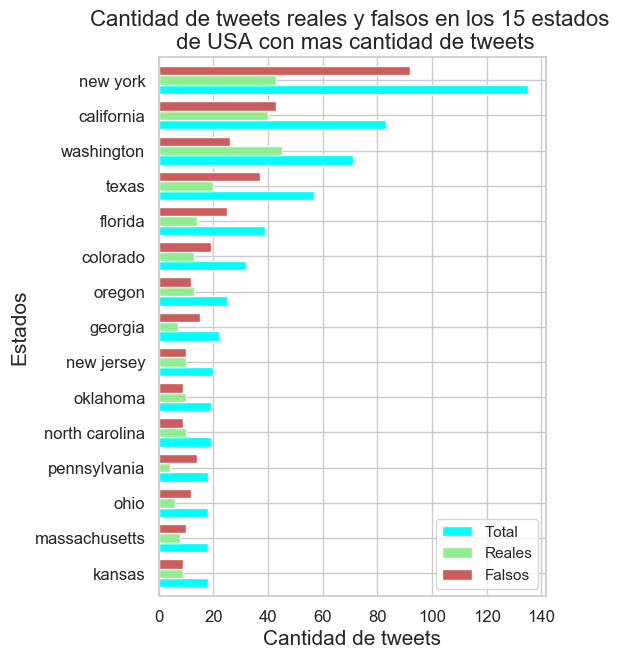

In [16]:
az = final.plot(kind='barh', fontsize=12, color=["Cyan","lightGreen","indianRed"],width=0.8,figsize=(5, 7))
az.legend(['Total', 'Reales', 'Falsos'])
az.set_title('Cantidad de tweets reales y falsos en los 15 estados \n de USA con mas cantidad de tweets', fontsize=16);
az.set_xlabel('Cantidad de tweets', fontsize=15);
az.set_ylabel('Estados', fontsize=15);

In [17]:
dfEstados_Veracidad = dfEstados['target'].value_counts().to_frame().T
dfEstados_Veracidad['Total'] = dfEstados.shape[0]
dfEstados_Veracidad.index = ['Especificado']


In [18]:
dfUSA_Veracidad = dfUSA['target'].value_counts().to_frame().T
dfUSA_Veracidad['Total'] = dfUSA.shape[0]
dfUSA_Veracidad.index = ['No especificado']

In [19]:
dfFinal = dfEstados_Veracidad.append(dfUSA_Veracidad, sort=False)
dfFinal.rename(columns={0: "Falsos", 1: "Reales"},inplace=True)

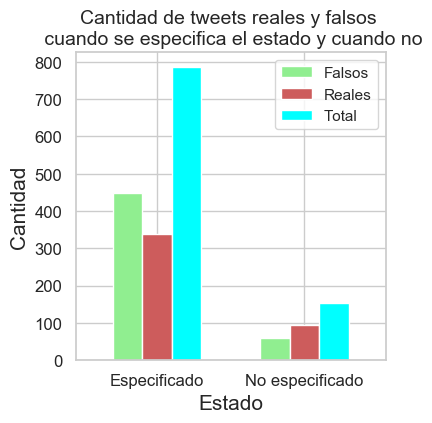

In [20]:
z = dfFinal.plot(kind='bar', fontsize=12, color=["lightGreen","indianRed","Cyan"], rot=0, width=0.6,figsize=(4, 4))#color= plt.cm.Paired(np.arange(len(sTop15))))

#plt.annotate(str(valorEstado), xy=(-0.1, 700), va='center',fontsize=20)
#plt.annotate(str(valorUSA), xy=(0.92, 60), va='center',fontsize=20)
z.set_title('Cantidad de tweets reales y falsos \n cuando se especifica el estado y cuando no', fontsize=14);
z.set_xlabel('Estado', fontsize=15);
z.set_ylabel('Cantidad', fontsize=15);

### WordCloud de Estados Unidos

In [21]:
dfUSA_total = dfEstados.append(dfUSA)

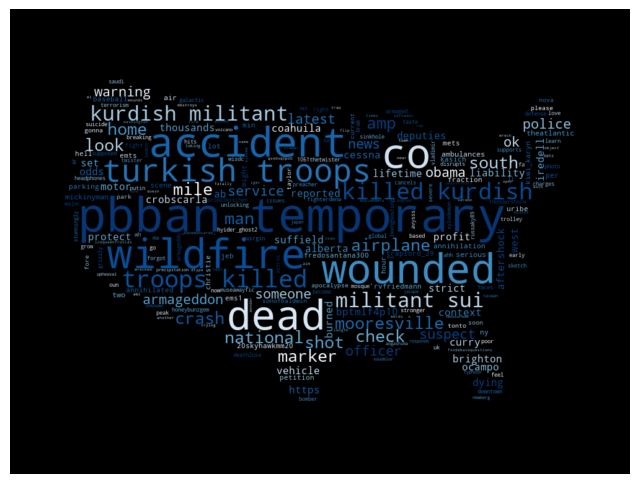

In [22]:
stopwords = set(STOPWORDS)
text = str(dfUSA_total['text'])
text = text.lower()

mask = np.array(Image.open("img/usa.jpg"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="black", mode="RGBA",colormap='Blues_r', max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud_usa, interpolation="bilinear")
plt.axis("off")



# store to file
#plt.savefig("img/fra_wine.png", format="png")

plt.show()

Nos muestra las palabras mas frecuentes en los tweets mandados desde estados unidos.

### WordCloud de India

In [23]:
lugaresIndia = ['india','mumbai','bangalore','delhi','hyderabad','telangana',\
                'ahmedabad','bihar',"andhra pradesh","arunachal pradesh ","assam",\
                "bihar","chhattisgarh","gujarat","haryana","himachal pradesh",\
                "kashmir","jharkhand","karnataka","kerala","madhya pradesh",\
                "maharashtra","manipur","meghalaya","mizoram","nagaland","odisha",\
                "punjab","rajasthan","sikkim","tamil nadu","telangana","tripura"\
                ,"uttar pradesh","uttarakhand","west bengal","andaman and nicobar islands"\
                ,"chandigarh","dadra", "haveli","daman and diu","lakshadweep",\
                "national capital territory of delhi","puducherry"]

In [24]:
dfIndia = dfLower[dfLower['location'].str.contains('|'.join(lugaresIndia))]

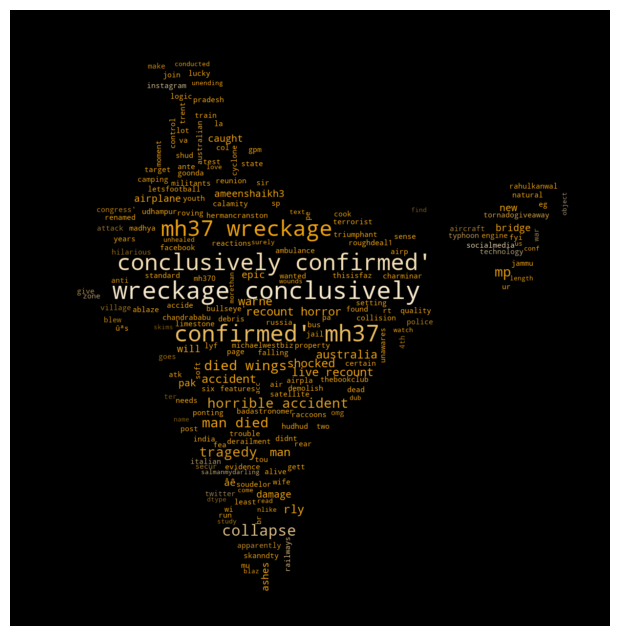

In [25]:
stopwords = set(STOPWORDS)
text = str(dfIndia['text'])
text = text.lower()

mask = np.array(Image.open("img/india.jpg"))
wordcloud_india = WordCloud(stopwords=stopwords, background_color="black", mode="RGBA", max_words=1000, mask=mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud_india.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


#plt.savefig("img/fra_wine.png", format="png")

plt.show()

## Comparativa entre India y Estados Unidos

In [26]:
dfIndia_veracidad = dfIndia['target'].value_counts()
dfUSA_total_veracidad = dfUSA_total['target'].value_counts(sort=False)

In [27]:
dfIndia_veracidad.rename('india',inplace=True)
dfUSA_total_veracidad.rename('USA',inplace=True)

0    507
1    433
Name: USA, dtype: int64

In [28]:
dfIndia_veracidad

1    83
0    41
Name: india, dtype: int64

In [29]:
dfIndia_veracidad = dfIndia_veracidad*100 /(dfIndia_veracidad.sum())
dfUSA_total_veracidad = dfUSA_total_veracidad*100 /(dfUSA_total_veracidad.sum())
dfFinal = pd.concat([dfIndia_veracidad, dfUSA_total_veracidad], axis=1)
dfFinal

,india,USA
0,33.06,53.94
1,66.94,46.06


In [30]:
dfFinal.index = ['Falso','Real']
dfFinal = dfFinal.T
dfFinal['Falso']=-dfFinal['Falso']
dfFinal

,Falso,Real
india,-33.06,66.94
USA,-53.94,46.06


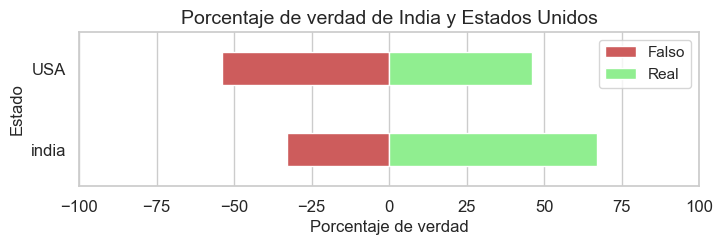

In [31]:
v = dfFinal.plot.barh( stacked=True, fontsize=12, color=["IndianRed","lightGreen"],\
              xlim=(-100.0, 100.0),width=0.4,figsize=(8, 2))

v.set_title('Porcentaje de verdad de India y Estados Unidos', fontsize=14);
v.set_xlabel('Porcentaje de verdad', fontsize=12);
v.set_ylabel('Estado', fontsize=12);
v.grid(axis='y')